In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df.head()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# QUESTIONS

### Number of Fundings

Problem Statement :

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :

There is some error in the 'Date' feature. Make sure to handle that.

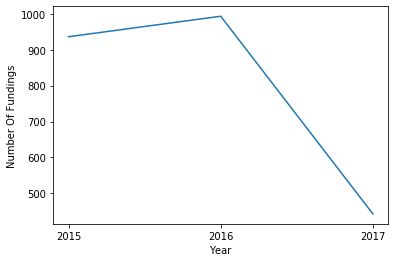

2015  936
2016  993
2017  443


In [4]:
# Open and read data file as specified in the question
# Print the required output in given format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df.iloc[2357, 1:2] = '22/01/2015'
df.iloc[2103] = '12/05/2015'
df.iloc[2104] = '12/05/2015'
df.iloc[2159] = '13/04/2015'
df.iloc[2339] = '15/01/2015'


year = df['Date'].str.split('/',expand = True)[2]
year_fund = year.value_counts()

x = []
y = []

for i in sorted(year_fund.index):
    x.append(i)
    y.append(year_fund[i])

plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Number Of Fundings')
plt.show()

for j in range(len(x)):
    print(x[j],'',y[j])


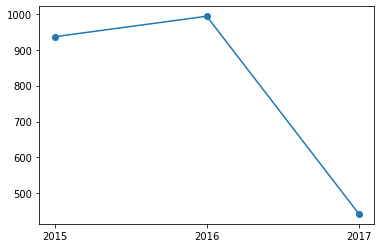

2015 936
2016 993
2017 443


In [14]:
# cn answer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df['Date'].replace("12/05.2015","12/05/2015",inplace=True)
df['Date'].replace("13/04.2015","13/04/2015",inplace=True)
df['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df['Date'].replace("22/01//2015","22/01/2015",inplace=True)

def convertDate(date):
    return date.split('/')[-1]

df['Year'] = df['Date'].apply(convertDate)
year_count = df['Year'].value_counts()
year_fund = list(zip(year_count.index, year_count.values))
year_fund = np.array(year_fund, dtype= int)
year_fund = year_fund[year_fund[:,0].argsort()]
year = year_fund[:,0]
Funding = year_fund[:,1]
plt.plot(year, Funding, marker = 'o')
plt.xticks(year)
plt.show()
for i in range(len(year)):
    print(year[i],Funding[i])

### Top Indian Cities

Problem Statement :

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

### Note :

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.


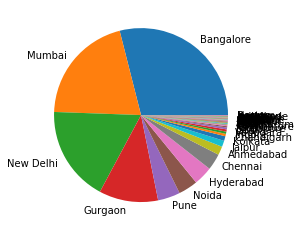

Bangalore   635
Mumbai   449
New Delhi   389
Gurgaon   241
Pune   91
Noida   79
Hyderabad   77
Chennai   67
Ahmedabad   35
Jaipur   25


In [40]:
df[df['CityLocation'] == 'Delhi'] = 'New Delhi'
df[df['CityLocation'] == 'bangalore'] = 'Bangalore'


city = df['CityLocation'].str.split('/',expand = True)[0]
city = city.str.strip(' ')
city_startup = city.value_counts()

x = city_startup.values
label = city_startup.index

plt.pie(x , labels = label)
plt.show()

for i in range(10):
    print(label[i],' ',x[i])

Bangalore   635
Mumbai   449
New Delhi   389
Gurgaon   241
Pune   91
Noida   79
Hyderabad   77
Chennai   67
Ahmedabad   35
Jaipur   25


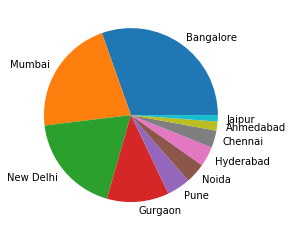

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()
df["CityLocation"].replace(["NaN", 'NaT'], np.nan, inplace = True)
df["CityLocation"].dropna(inplace=True)

def sep_city(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(sep_city)
df['CityLocation'].replace('Delhi','New Delhi', inplace = True)
df['CityLocation'].replace('bangalore','Bangalore', inplace = True)

city_startup = df['CityLocation'].value_counts()[0:10]

x = city_startup.values
label = city_startup.index

plt.pie(x , labels = label)

for i in range(len(city_startup)):
    print(label[i],' ',x[i])

### Funding amount

Problem Statement :

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

### Note: 

Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()
df["CityLocation"].replace(["NaN", 'NaT'], np.nan, inplace = True)
df["CityLocation"].dropna(inplace=True)

def sep_city(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(sep_city)
df['CityLocation'].replace('Delhi','New Delhi', inplace = True)
df['CityLocation'].replace('bangalore','Bangalore', inplace = True)


df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','')
df['AmountInUSD'] = df['AmountInUSD'].fillna(0)
df['AmountInUSD'] = df['AmountInUSD'].astype(int)

investment = df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending = False)[0:10]

total = investment.sum()

for i in range(10):
    print(investment.index[i],format((investment[i]/total)*100,'.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


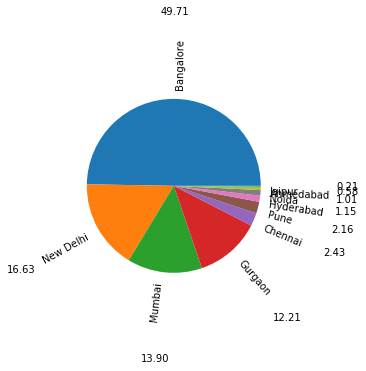

In [62]:
# dm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
file_pd= pd.read_csv("Datasets/startup_funding.csv",encoding="utf8")
df2= file_pd.copy()
df2["CityLocation"].replace(["NaN", 'NaT'], np.nan, inplace = True)
df2["CityLocation"].dropna(inplace=True)

def sep_city(city):
    return city.split("/")[0].strip()


df2["CityLocation"]= df2["CityLocation"].apply(sep_city)
df2["CityLocation"].replace("Delhi","New Delhi",inplace=True)
df2["CityLocation"].replace("bangalore","Bangalore",inplace=True)

df2["AmountInUSD"]=df2["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
#df2["AmountInUSD"].fillna(0,inplace=True)
#   
df2["AmountInUSD"]= pd.to_numeric(df2["AmountInUSD"])
#df2["AmountInUSD"]

city_amount= df2.groupby("CityLocation")["AmountInUSD"].sum().sort_values(ascending=False)[0:10]
#all_city_i=amount.first()
#x=all_city_i.sort_values(ascending=False)
#list_index=[1,2,6,7,8,9,11,12,13,14]

#list_city=["Gurgaon","Noida","Ahmedabad","Pune","Bangalore","Lucknow","Hyderabad","Panaji","Belgaum","Gwalior"]
#print(x)
#list_amt=[]
#list_pct=["38.56","25.71","15.42","3.86","3.79","3.47","3.34","2.89","1.67","1.29"]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))
#for i in range(10):
#    list_amt.append(x[i])
#    print(list_city[i],list_pct[i])

plt.pie(amountCity,labels=city,autopct= "%.2f",rotatelabels=True,pctdistance=2)
plt.show()

### Investment Type


Problem Statement :

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :

Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

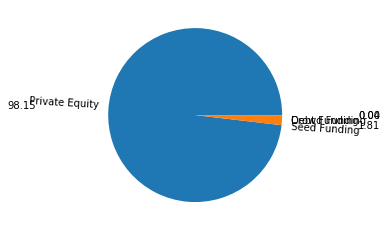

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').fillna(0).astype(int)

df['InvestmentType'].replace('PrivateEquity', 'Private Equity', inplace = True)
df['InvestmentType'].replace ('SeedFunding', 'Seed Funding', inplace = True)
df['InvestmentType'].replace('Crowd funding', 'Crowd Funding', inplace = True)
df['InvestmentType'].dropna(inplace = True)

invest_type = df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending = False)

percent = np.true_divide(invest_type.values, invest_type.values.sum())*100

plt.pie(invest_type,labels = invest_type.index,autopct= "%.2f",rotatelabels=True,pctdistance=2)
plt.show()

for i in range(len(invest_type)):
    print(invest_type.index[i],format(percent[i],'.2f'))

### Top Industries

Problem Statement :

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :

Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


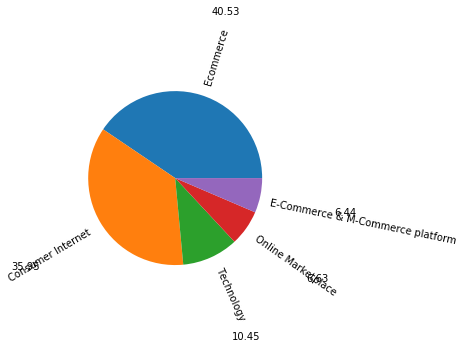

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df['IndustryVertical'].replace('eCommerce','Ecommerce', inplace = True)
df['IndustryVertical'].replace('ECommerce','Ecommerce', inplace = True)
df['IndustryVertical'].replace('ecommerce','Ecommerce', inplace = True)
df['IndustryVertical'].dropna(inplace = True)
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').fillna(0).astype(int)

invest_indus = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]

perc = np.true_divide(invest_indus.values, invest_indus.values.sum())*100

for i in range(len(invest_indus)):
    print(invest_indus.index[i],format(perc[i],'.2f'))
    
plt.pie(invest_indus,labels = invest_indus.index,autopct= "%.2f",rotatelabels=True,pctdistance=2)
plt.show()

#df['IndustryVertical'].unique()

### Top startups

Problem Statement :

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)

df['StartupName'].dropna(inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','').fillna(0).astype(int)

invest_startup = df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending = False)[0:5]

for i in invest_startup.index:
    print(i)
    

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [179]:
# this i used to check for wrong spellings

a= df.sort_values(by = 'AmountInUSD',ascending = False)
a.head(20)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
294,294,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1400000000,NaN
158,158,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1400000000,NaN
1976,1976,28/7/2015,Flipkart,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,700000000,"Late Stage, 10th Round More here"
1787,1787,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,680000000,Late Stage (Alibaba @ 40% equity)
1572,1572,18/11/2015,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,500000000,Series F ( More Details Here)
1798,1798,01/08/2015,Snapdeal,Ecommerce Marketplace,NaN,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,500000000,Late Stage Round 7th (More details)
2148,2148,08/04/2015,Ola,Cab Aggregator,NaN,Bangalore,"DST Global, Steadview Capital, Tiger Global, A...",Private Equity,400000000,Series E (Updated from 315M to 400M after Pres...
252,252,01/03/2017,Ola,Consumer Internet,App based cab aggregator,Bangalore,SoftBank Group Corp,Private Equity,330000000,NaN
217,217,14/04/2017,Ola,Consumer Internet,Cab Aggregator App,Bangalore,SIMI Pacific Pte,Private Equity,260000000,NaN
234,234,24/04/2017,Oyo,Consumer Internet,Branded Budget Hotels Aggregator,Gurgaon,"SoftBank Vision Fund, Lightspeed Venture Partn...",Private Equity,250000000,NaN


### Funding rounds

Problem Statement :

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:

Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [188]:
# wrong ans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df['StartupName'].replace('Flipkart.com','Flipkart', inplace = True)
df['StartupName'].replace('Ola Cabs','Ola', inplace = True)
df['StartupName'].replace('Olacabs','Ola', inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo', inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace = True)
df['StartupName'].replace('Oyorooms','Oyo', inplace = True)
df['StartupName'].replace('OyoRooms','Oyo', inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo', inplace = True)

df['StartupName'].dropna(inplace = True)

top = df['StartupName'].value_counts()

for i in top.index[0:5]:
    print(i,top[i])

Ola 9
Swiggy 7
UrbanClap 6
Oyo 6
Paytm 6


### Top Investor

Problem Statement :

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:

In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()

df.dropna(subset = ['InvestorsName'],inplace = True)

def sep_investor(name):
    return name.split(', ')[0]
df['InvestorsName'] = df['InvestorsName'].apply(sep_investor)
df.reset_index(drop = True,inplace = True)
count = 0

d = {}
for i in df['InvestorsName']:
    
    d[i] = d.get(i,0) + 1

for i in d:
    if d[i] == max(d.values()):
        print(i, d[i])

Sequoia Capital 39


In [35]:
# cn ta

import pandas as pd
df=pd.read_csv('Datasets/startup_funding.csv')
df.AmountInUSD.fillna(0,inplace=True)
def f(s):
    if s==0:
        return 0
    li=str(s).split(',')
    k=""
    for ele in li:
        k+=ele
    return int(k)
df['Amount']=df.AmountInUSD.apply(f)

d={}
x=set()
for ele in df.InvestorsName:
    x.add(ele)
li=list(x)

while li:
    y=li.pop()
    a=len(df[df.InvestorsName==y])
    d[y]=a
d1={}
for ele in d:
    if "," in str(ele):
        li=ele.split(",")
        for x in li:
            x=x.strip()
            d1[x]=d1.get(x,d[ele])+1

for ele in d1:
    if ele in d:
        d[ele]+=d1[ele]
    else:
        d[ele]=d1[ele]
li=[]

for ele in d:
    li.append(d[ele])
li.sort()
li=li[::-1]


for ele in d:
    if d[ele]==li[0]:
        print(ele,d[ele])

Sequoia Capital 64


In [36]:
# cn soluntion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv("Datasets/startup_funding.csv")
df = file.copy()
df.dropna(subset = ['InvestorsName'],inplace = True)

def createDict(arr):
    d = {}
    for i in arr:
        if ',' not in i:
            
            d[i] = d.get(i,0) + 1
        else:
            string = i.strip().split(',')
            for j in string:
                
                d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d

dictionary = createDict(df['InvestorsName'])

dataf = pd.DataFrame(list(d.values()),list(d.keys()))
dataf = dataf.sort_values(by = [0], ascending = False)

print(dataf.index[0],dataf.values[0][0])

Sequoia Capital 64


In [1]:
# dm

import numpy as np
import csv
with open('Datasets/startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)

    np_y=np_y[::-1]
    np_x=np_x[::-1]
    print(np_x[0], np_y[0])

Sequoia Capital 64


## Case Study : Questions

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

['Bangalore', ' Bangkok']
['SFO ', ' Bangalore']
['Seattle ', ' Bangalore']
['Pune', 'Seattle']
['Pune ', ' Dubai']
['Bangalore ', ' SFO']
['New Delhi ', ' US']
['Mumbai ', ' UK']
['Hyderabad', 'USA']
['Bangalore ', ' Palo Alto']
['Mumbai ', ' NY']
['USA', 'India']
['Bangalore', ' Bangkok']
['Goa', 'Hyderabad']
['Noida ', ' Singapore']
['Pune ', ' US']
['Chennai', ' Singapore']
['Pune ', ' Singapore']
['Bangalore ', ' San Mateo']
['New York', ' India']
['US', 'India']
['Gurgaon ', ' SFO']
['Bangalore ', ' USA']
['New Delhi', ' Houston']
['New Delhi ', ' US']
['Mumbai ', ' Global']
['India ', ' US']
['Pune ', ' US']
['Pune ', ' US']
['New Delhi ', ' California']
['Dallas ', ' Hyderabad']
['Bangalore ', ' SFO']
['Pune ', ' US']
Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Hyderabad 79
Noida 79
Chennai 67
Ahmedabad 35
Jaipur 25


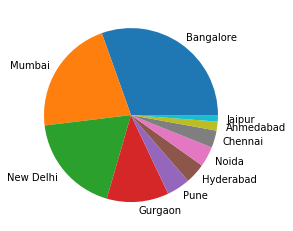

In [2]:
# dm

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df=pd.read_csv("Datasets/startup_funding.csv")
df[df["CityLocation"]=="Delhi"]="New Delhi"
df[df["CityLocation"]=="bangalore"]="Bangalore"
df["CityLocation"].fillna("",inplace=True)

d={}
for i in range(len(df)):
    if df["CityLocation"][i]!="":
        if '/' in df["CityLocation"][i]:
            k=df["CityLocation"][i].split("/")
            
            print(k)
            if k[0].strip() in d:
                d[k[0].strip()] += 1
            else:
                d[k[0].strip()] = 1
            if k[1].strip() in d:
                d[k[1].strip()] += 1
            else:
                d[k[1].strip()] = 1

        else:
            
            if df["CityLocation"][i] in d:
                d[df["CityLocation"][i]]+=1
            else:
                d[df["CityLocation"][i]]=1

sorted_d = sorted(d.items(), key=lambda kv: kv[1],reverse = True)
city=[]
cityname=[]

for i in range(10):
    print(sorted_d[i][0],sorted_d[i][1])
    city.append(sorted_d[i][1])
    cityname.append(sorted_d[i][0])
plt.pie(city,labels=cityname)
plt.show()